https://github.com/astrologos/tradinggym/blob/main/examples/example.ipynb

In [197]:
# Imports
# System utils 
from IPython.core.interactiveshell import InteractiveShell

# Data Processing
import pandas as pd

# Plotting
import matplotlib.pyplot as plt 

# Reinforcement Learning
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3 import DQN
from stable_baselines3 import PPO
from env import CryptoEnvironment#, MyCryptoEnvironment

# NB Setup
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('dark_background')

In [198]:

class MyCryptoEnvironment(CryptoEnvironment):
    def reset(self, seed=None):
        # Call the parent class's reset method, which doesn't expect a seed
        return super().reset()

In [199]:
# gpu 설정
import torch

device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)

In [200]:
# Load data from disk
# Make sure there is lots of data as padding is finnicky due to batch normalization and forward-looking reward calculation
data = pd.read_pickle('../data/measurement.pickle')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,Open,High,Low,Close,Volume,taker_buy_quote_asset_volume,AROON,%D,KCU,KCL,FI,DIFFRSI,SRSI,TRIX_HIST,AO
open_time,,,,,,,,,,,,,,,
1641028200000,47142.39,47142.39,47142.39,47142.39,0.000000,0.000000,-50.0,25.179543,47170.9185,47170.9185,-29.604093,2.268637,0.921130,0.000172,10.694618
1641028500000,47142.39,47142.39,47142.02,47142.02,0.003924,0.000000,-50.0,28.406955,47176.5515,47175.0715,-30.705597,2.268637,0.870136,0.000120,8.697912
1641028800000,47142.02,47142.02,47142.02,47142.02,0.000000,0.000000,-50.0,28.360903,47179.2515,47179.2515,-36.811017,2.268637,0.898510,0.000091,12.269794
1641029100000,47103.27,47124.42,47103.27,47124.42,0.006091,286.978747,-50.0,26.124242,47222.5195,47137.9195,-21.958556,1.749303,1.000000,-0.000079,15.217794
1641029400000,47112.96,47118.73,47112.96,47118.73,0.031840,0.000000,-50.0,23.225421,47190.9215,47167.8415,-24.834712,1.749303,0.948227,-0.000038,13.979676


(144634, 15)

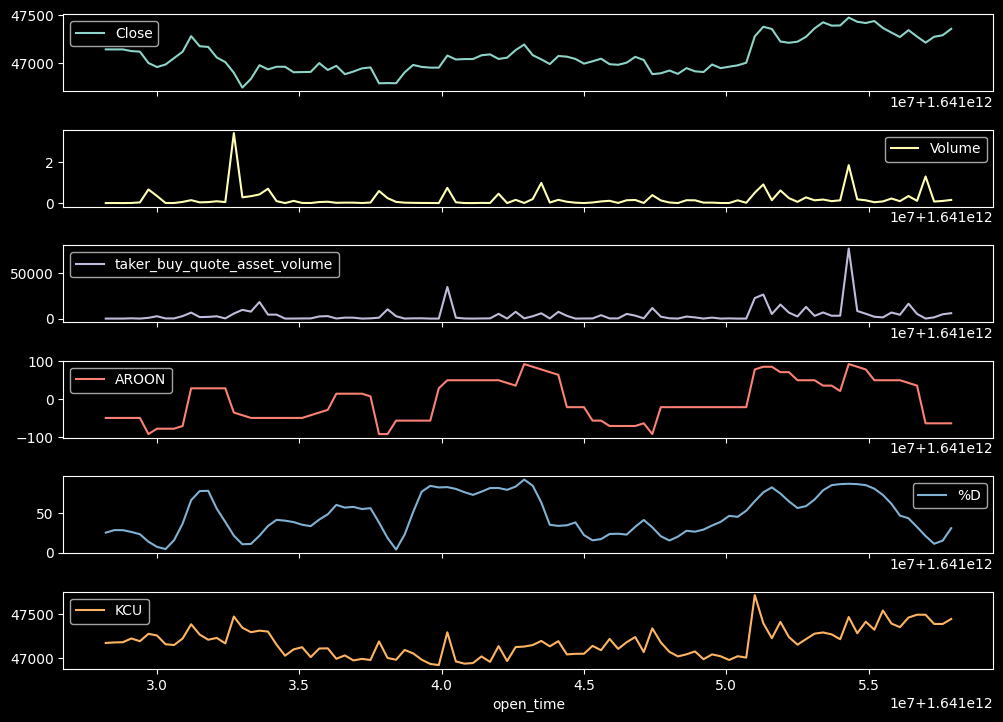

In [201]:
# Visual EDA, show subplots vertically
ax = data[data.columns[3:9]][:100].plot(subplots=True, layout=(len(data.columns), 1), figsize=(12, 22));
plt.subplots_adjust(hspace=0.5);
plt.legend(loc='upper right', bbox_to_anchor=(0,0), ncol=1);
data.head()
data.shape

# Set up environment

In [206]:
# Create the CryptoEnvironment instance
window_size = 10
env = CryptoEnvironment(observations=data, initial_value = 10000, window_size=window_size, order_fraction=0.66, trade_fee=0.003375)

# Wrap the environment in a vectorized form
env = DummyVecEnv([lambda: env])
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Create Agent

In [207]:
import stable_baselines3
stable_baselines3.common.utils.get_device("mps")

device(type='mps')

In [208]:
# Create the agent

model = PPO('MlpPolicy',env,verbose=1,n_steps=64,gamma=0.5,ent_coef=0.5, learning_rate = 0.0001,
            tensorboard_log="./tensorboard/CryptoEnvironment", device=device) # Create model
model.save("trading_model_orig.torch") # Save model
del model # Delete model to demonstrate how to load
model = PPO.load('trading_model_orig.torch', env=env) # Load model

Using mps device


In [209]:
%%capture
# Train agent
for i in range(1):
    model.learn(total_timesteps=1000,reset_num_timesteps=False)
    model.save('./models/PPO/' + 'trading_model_chkpt_orig' + '.torch')

TypeError: CryptoEnvironment.reset() got an unexpected keyword argument 'seed'